# Census Data

* **Inspo:** https://www.nytimes.com/2019/05/01/upshot/all-white-neighborhoods-are-dwindling-as-america-grows-more-diverse.html
* **Datasets:**
    - `1980.csv` - table for 1980
    - `1980.txt` - codebook
    - same for `1990`, `2000`, `2010`
* **Source:** Social Explorer, which you can access through https://library.columbia.edu
* **Topics:**
    - LOL @ the US government
    - renaming columns
    - a real fun way to import data
    - a real fun way to rename columns
    - census data

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("1980.csv", encoding='latin-1', dtype={"Geo_FIPS" : str})
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,SE_T012_001,SE_T012_002,SE_T012_003,SE_T012_004,SE_T012_005,SE_T012_006
0,01001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1583.979102,1543.979630,31.999578,2.99996,4.999934,0.000000
1,01001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2233.000029,840.000011,1388.000018,0.00000,3.000000,2.000000
2,01001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,3136.000025,2634.000021,467.000004,12.00000,19.000000,4.000000
3,01001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4927.999972,4889.999972,1.000000,8.00000,10.000000,19.000000
4,01001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,1531.185570,1430.276440,70.388402,6.99304,8.286086,15.241602


In [3]:
df.columns

Index(['Geo_FIPS', 'Geo_NAME', 'Geo_QName', 'Geo_NATION', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_CT', 'SE_T012_001', 'SE_T012_002', 'SE_T012_003',
       'SE_T012_004', 'SE_T012_005', 'SE_T012_006'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace("SE_", "")


In [5]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,T012_001,T012_002,T012_003,T012_004,T012_005,T012_006
0,01001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1583.979102,1543.979630,31.999578,2.99996,4.999934,0.000000
1,01001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2233.000029,840.000011,1388.000018,0.00000,3.000000,2.000000
2,01001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,3136.000025,2634.000021,467.000004,12.00000,19.000000,4.000000
3,01001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4927.999972,4889.999972,1.000000,8.00000,10.000000,19.000000
4,01001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,1531.185570,1430.276440,70.388402,6.99304,8.286086,15.241602


In [6]:
codes = pd.read_csv("1980.txt", sep=':  ', skiprows=41, nrows=13, names=["code", "name"], engine='python')

In [7]:
codes

,code,name
0,FIPS,FIPS
1,NAME,Name of Area
2,QName,Qualifying Name
3,NATION,Nation
4,STATE,State
5,COUNTY,County
6,CT,Census Tract
7,T012_001,Total Population
8,T012_002,Total Population: White
9,T012_003,Total Population: Black


In [8]:
codes['name'] = codes.name.str.strip()
codes_dict = dict(zip(codes.code, codes.name))

In [9]:
df = df.rename(columns=codes_dict)

In [10]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,Total Population,Total Population: White,Total Population: Black,"Total Population: American Indian, Eskimo, and Aleut",Total Population: Asian and Pacific Islander,Total Population: Other
0,01001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1583.979102,1543.979630,31.999578,2.99996,4.999934,0.000000
1,01001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2233.000029,840.000011,1388.000018,0.00000,3.000000,2.000000
2,01001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,3136.000025,2634.000021,467.000004,12.00000,19.000000,4.000000
3,01001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4927.999972,4889.999972,1.000000,8.00000,10.000000,19.000000
4,01001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,1531.185570,1430.276440,70.388402,6.99304,8.286086,15.241602


In [11]:
df['pct_white'] = df['Total Population: White'] / df['Total Population']
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,Total Population,Total Population: White,Total Population: Black,"Total Population: American Indian, Eskimo, and Aleut",Total Population: Asian and Pacific Islander,Total Population: Other,pct_white
0,01001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1583.979102,1543.979630,31.999578,2.99996,4.999934,0.000000,0.974747
1,01001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2233.000029,840.000011,1388.000018,0.00000,3.000000,2.000000,0.376176
2,01001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,3136.000025,2634.000021,467.000004,12.00000,19.000000,4.000000,0.839923
3,01001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4927.999972,4889.999972,1.000000,8.00000,10.000000,19.000000,0.992289
4,01001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,1531.185570,1430.276440,70.388402,6.99304,8.286086,15.241602,0.934097


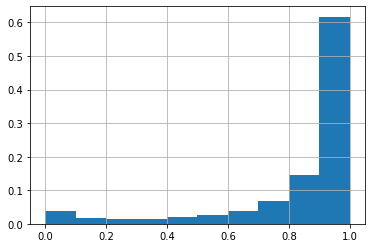

In [12]:
df.pct_white.hist(bins=10, weights = np.ones_like(df.pct_white.dropna())/len(df.pct_white.dropna()))

In [13]:
important = df[["Geo_FIPS", "pct_white"]]

In [14]:
important.to_csv("1980_pct.csv", index=False)

In [15]:
df_1990 = pd.read_csv("1990.csv", encoding="latin-1", dtype={"Geo_FIPS" : str})

In [16]:
df_1990.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,SE_T011_001,SE_T011_002,SE_T011_003,SE_T011_004,SE_T011_005,SE_T011_006
0,01001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1772.976608,1715.977360,36.999512,3.999947,10.999855,4.999934
1,01001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2031.000026,749.000010,1262.000016,7.000000,11.000000,2.000000
2,01001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,2952.000024,2526.000020,405.000003,2.000000,16.000000,3.000000
3,01001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4400.999975,4311.999975,41.000000,16.000000,29.000000,3.000000
4,01001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,2135.966995,2021.969229,86.897481,2.725195,17.620241,6.754850


In [17]:
df_1990.columns = df_1990.columns.str.replace("SE_", "")


In [18]:
df_1990.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,T011_001,T011_002,T011_003,T011_004,T011_005,T011_006
0,01001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1772.976608,1715.977360,36.999512,3.999947,10.999855,4.999934
1,01001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2031.000026,749.000010,1262.000016,7.000000,11.000000,2.000000
2,01001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,2952.000024,2526.000020,405.000003,2.000000,16.000000,3.000000
3,01001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4400.999975,4311.999975,41.000000,16.000000,29.000000,3.000000
4,01001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,2135.966995,2021.969229,86.897481,2.725195,17.620241,6.754850


In [19]:
codes_1990 = pd.read_csv("1990.txt", sep=':  ', skiprows=42, nrows=13, names=["code", "name"], engine='python')
codes_1990

,code,name
0,NAME,Name of Area
1,QName,Qualifying Name
2,NATION,Nation
3,STATE,State
4,COUNTY,County
5,CT,Census Tract
6,T011_001,Persons
7,T011_002,Persons: White
8,T011_003,Persons: Black
9,T011_004,"Persons: American Indian, Eskimo, or Aleut"


In [20]:
codes_1990_dict = dict(zip(codes_1990.code, codes_1990.name.str.strip()))

In [21]:
df_1990 = df_1990.rename(columns=codes_1990_dict)
df_1990.head()
lens = df_1990.Geo_FIPS.apply(lambda cell : len(cell))
lens.value_counts()

11    74002
Name: Geo_FIPS, dtype: int64

In [22]:
df_1990['pct_white'] = df_1990['Persons: White'] / df_1990['Persons']
df_1990.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,Persons,Persons: White,Persons: Black,"Persons: American Indian, Eskimo, or Aleut",Persons: Asian or Pacific Islander,Persons: Other race,pct_white
0,01001020100,Census Tract 201,"Census Tract 201, Autauga County, Alabama",0,1,1,20100,1772.976608,1715.977360,36.999512,3.999947,10.999855,4.999934,0.967851
1,01001020200,Census Tract 202,"Census Tract 202, Autauga County, Alabama",0,1,1,20200,2031.000026,749.000010,1262.000016,7.000000,11.000000,2.000000,0.368784
2,01001020300,Census Tract 203,"Census Tract 203, Autauga County, Alabama",0,1,1,20300,2952.000024,2526.000020,405.000003,2.000000,16.000000,3.000000,0.855691
3,01001020400,Census Tract 204,"Census Tract 204, Autauga County, Alabama",0,1,1,20400,4400.999975,4311.999975,41.000000,16.000000,29.000000,3.000000,0.979777
4,01001020500,Census Tract 205,"Census Tract 205, Autauga County, Alabama",0,1,1,20500,2135.966995,2021.969229,86.897481,2.725195,17.620241,6.754850,0.946629


In [23]:
important_1990 = df_1990[["Geo_FIPS", "pct_white"]]
important_1990.to_csv("1990_pct.csv", index=False)

In [24]:
important_1990

,Geo_FIPS,pct_white
0,01001020100,0.967851
1,01001020200,0.368784
2,01001020300,0.855691
3,01001020400,0.979777
4,01001020500,0.946629
5,01001020600,0.779532
6,01001020700,0.931122
7,01001020801,0.856678
8,01001020802,0.864027
9,01001020900,0.786630


In [25]:
df_2000 = pd.read_csv("2000.csv", encoding="latin-1", dtype={"Geo_FIPS" : str})
df_2000.columns = df_2000.columns.str.replace("SE_", "")
df_2000.head()
df_2000.dtypes

Geo_FIPS       object
Geo_NAME       object
Geo_QName      object
Geo_NATION      int64
Geo_STATE       int64
Geo_COUNTY      int64
Geo_CT          int64
T012_001      float64
T012_002      float64
T012_003      float64
T012_004      float64
T012_005      float64
T012_006      float64
T012_007      float64
T012_008      float64
dtype: object

In [26]:
codes_2000 = pd.read_csv("2000.txt", sep=':  ', skiprows=44, nrows=14, names=["code", "name"], engine='python')
codes_2000

,code,name
0,NAME,Name of Area
1,QName,Qualifying Name
2,NATION,Nation
3,STATE,State
4,COUNTY,County
5,CT,Census Tract
6,T012_001,Total Population
7,T012_002,White Alone
8,T012_003,Black or African American Alone
9,T012_004,American Indian and Alaska Native Alone


In [27]:
codes_2000_dict = dict(zip(codes_2000.code, codes_2000.name.str.strip()))
df_2000 = df_2000.rename(columns=codes_2000_dict)
df_2000['pct_white'] = df_2000['White Alone'] / df_2000['Total Population']
important_2000 = df_2000[["Geo_FIPS", "pct_white"]]
important_2000.to_csv("2000_pct.csv", index=False)


In [28]:
df_2010 = pd.read_csv("2010.csv", encoding="latin-1", dtype={"Geo_FIPS" : str})
df_2010.columns = df_2010.columns.str.replace("SE_", "")
df_2010.Geo_FIPS.value_counts(ascending=False).head()
# lens = df_2010.Geo_FIPS.apply(lambda cell : len(cell))
# lens.value_counts()

26001163550800    1
24017031700704    1
47004089070100    1
32011003002942    1
06009001451403    1
Name: Geo_FIPS, dtype: int64

In [29]:
codes_2010 = pd.read_csv("2010.txt", sep=':  ', skiprows=43, nrows=18, names=["code", "name"], engine='python')
codes_2010

,code,name
0,NAME,Area Name-Legal/Statistical Area Desc...
1,QName,Qualifying Name
2,AREALAND,Area (Land)
3,AREAWATR,Area (Water)
4,SUMLEV,Summary Level
5,GEOCOMP,Geographic Component
6,FIPS,FIPS
7,T054_001,Total population
8,T054_002,Total population: White alone
9,T054_003,Total population: Black or African Americ...


In [30]:
codes_2010_dict = dict(zip(codes_2010.code, codes_2010.name.str.strip()))
df_2010 = df_2010.rename(columns=codes_2010_dict)
df_2010['pct_white'] = df_2010['Total population: White alone'] / df_2010['Total population']
df_2010["Geo_FIPS"] = df_2010.Geo_FIPS.apply(lambda code : code[:3] + code[-8:])
df_2010 = df_2010.drop_duplicates(subset=['Geo_FIPS'], keep=False)
important_2010 = df_2010[["Geo_FIPS", "pct_white"]]
important_2010.to_csv("2010_pct.csv", index=False)

In [31]:
first_two = important.merge(important_1990, on="Geo_FIPS", suffixes=("_1980", "_1990"))
first_two

,Geo_FIPS,pct_white_1980,pct_white_1990
0,01001020100,0.974747,0.967851
1,01001020200,0.376176,0.368784
2,01001020300,0.839923,0.855691
3,01001020400,0.992289,0.979777
4,01001020500,0.934097,0.946629
5,01001020600,0.803399,0.779532
6,01001020700,0.932092,0.931122
7,01001020801,0.789803,0.856678
8,01001020802,0.788549,0.864027
9,01001020900,0.765748,0.786630


In [32]:
# first_three = first_two.merge(important_2000)
first_three = first_two.merge(important_2000, on=["Geo_FIPS"]).rename(columns={"pct_white" : "pct_white_2000"})
first_three.head()

,Geo_FIPS,pct_white_1980,pct_white_1990,pct_white_2000
0,01001020100,0.974747,0.967851,0.902134
1,01001020200,0.376176,0.368784,0.360994
2,01001020300,0.839923,0.855691,0.826595
3,01001020400,0.992289,0.979777,0.950395
4,01001020500,0.934097,0.946629,0.908188


In [33]:
i_10 = important_2010


In [39]:
res = first_three.merge(i_10, on=["Geo_FIPS"]).rename(columns={"pct_white" : "pct_white_2010"})
res.shape

(43343, 5)

In [45]:
res = res.dropna()
res.head()

,Geo_FIPS,pct_white_1980,pct_white_1990,pct_white_2000,pct_white_2010
0,01001020100,0.974747,0.967851,0.902134,0.848326
1,01001020200,0.376176,0.368784,0.360994,0.409217
2,01001020300,0.839923,0.855691,0.826595,0.763712
3,01001020400,0.992289,0.979777,0.950395,0.931601
4,01001020500,0.934097,0.946629,0.908188,0.804941


In [44]:
res.to_csv("yearly_white_pcts.csv", index=False)